Exercise 1 
If you did the exercises in the previous chapter, you downloaded the historical price of BitCoins and estimated the power spectrum of the price changes. Using the same data, compute the autocorrelation of BitCoin prices. Does the autocorrelation function drop off quickly? Is there evidence of periodic behavior?

如果您在上一章中進行了練習，則下載了比特幣的歷史價格並估算了價格變化的功率譜。使用相同的數據，計算比特幣價格的自相關。自相關功能是否會迅速消失？是否有定期行為的證據？

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

匯入csv

In [2]:
import pandas as pd

df = pd.read_csv('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv', 
                 parse_dates=[0])

ys = df['Closing Price (USD)']
ts = df.index

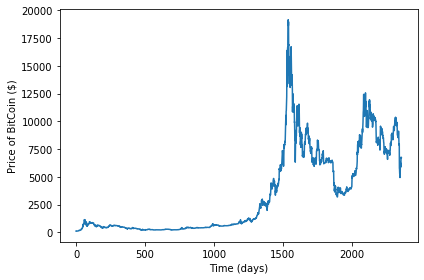

In [3]:
from thinkdsp import Wave

wave = Wave(ys, ts, framerate=1)
wave.plot()
decorate(xlabel='Time (days)',
         ylabel='Price of BitCoin ($)')

這是使用統計定義的自相關函數，將平均值移到零，除以標準偏差，然後將總和除以N。

In [4]:
def autocorr(wave): # 計算並繪製自相關函數。
    
    lags = np.arange(len(wave.ys)//2)
    corrs = [serial_corr(wave, lag) for lag in lags]
    return lags, corrs

In [5]:
def serial_corr(wave, lag=1): # 計算lag後的序列相關性
   
    n = len(wave)
    y1 = wave.ys[lag:]
    y2 = wave.ys[:n-lag]
    corr_mat = np.corrcoef(y1, y2)
    return corr_mat[0, 1]

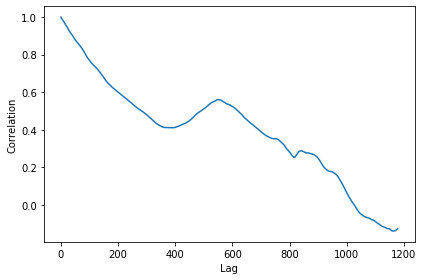

In [6]:
lags, corrs = autocorr(wave)
plt.plot(lags, corrs)
decorate(xlabel='Lag',
         ylabel='Correlation')

log後，ACF會緩慢下降，表明出現某種粉紅噪聲。

我們可以將我的autocorr實現與np.correlate進行比較，後者使用信號處理中使用的相關性定義。它不會使波形無偏，歸一化或標準化。

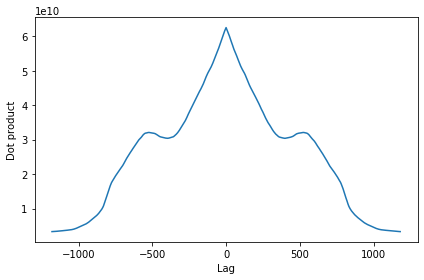

In [7]:
N = len(wave)
corrs2 = np.correlate(wave.ys, wave.ys, mode='same')
lags = np.arange(-N//2, N//2)
plt.plot(lags, corrs2)
decorate(xlabel='Lag',
         ylabel='Dot product')

log後結果的後一半

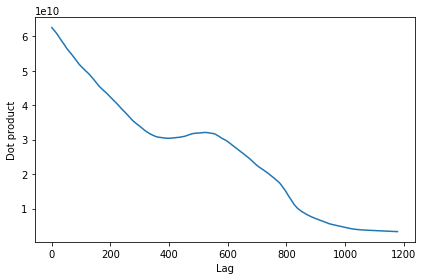

In [10]:
N = len(corrs2)
half = corrs2[N//2:]
plt.plot(half)
decorate(xlabel='Lag',
         ylabel='Dot product')

通過除以長度之後的結果標準化：

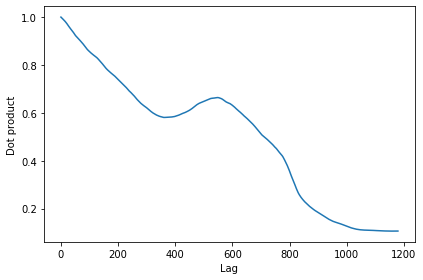

In [11]:
lengths = range(N, N//2, -1)
half /= lengths
half /= half[0]
plt.plot(half)
decorate(xlabel='Lag',
         ylabel='Dot product')

將兩個比較

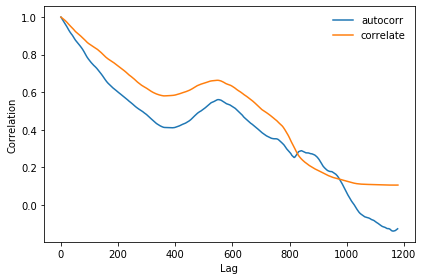

In [12]:
plt.plot(corrs, label='autocorr')
plt.plot(half, label='correlate')
decorate(xlabel='Lag', ylabel='Correlation')